In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
tf.random.set_seed(3)
from PIL import Image
from tensorflow import keras
import cv2
from google.colab.patches import cv2_imshow
from keras.datasets import mnist
from tensorflow.math import confusion_matrix



In [3]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
print(Y_train[0])

5


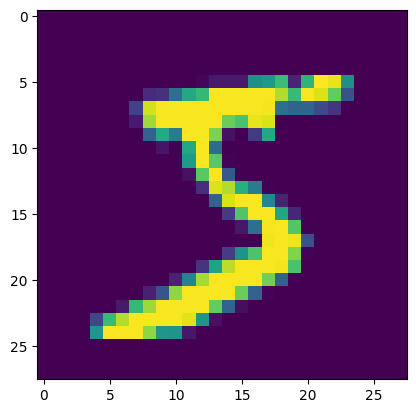

In [7]:
plt.imshow(X_train[0])
plt.show()

In [8]:
print(X_train[0].shape)

(28, 28)


In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building Neural Network**

In [11]:
model = keras.Sequential([

                 keras.layers.Flatten(input_shape=(28,28)),
                 keras.layers.Dense(50,activation='relu'),
                 keras.layers.Dense(50,activation='relu'),
                 keras.layers.Dense(10,activation='sigmoid'),

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile( optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy']
               )

In [13]:
model.fit(X_train,Y_train,epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8547 - loss: 0.5116
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9566 - loss: 0.1474
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9685 - loss: 0.1058
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9760 - loss: 0.0812
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9806 - loss: 0.0659
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9844 - loss: 0.0538
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9863 - loss: 0.0462
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9878 - loss: 0.0406
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9900 - loss: 0.0346
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0343


In [14]:
loss, accuracy = model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9679 - loss: 0.1306


In [15]:
print(accuracy)

0.972000002861023


In [16]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
print(Y_pred.shape)

(10000, 10)


In [18]:
print(Y_test[50])

6


In [19]:
print(Y_pred[50])

[1.2647280e-01 1.3347904e-03 1.7490461e-02 2.5425625e-03 5.7898313e-03
 8.3629102e-01 9.9999523e-01 3.0292242e-07 5.3774086e-03 1.1997070e-04]


In [20]:
Y_pred_label_for_first_img = np.argmax(Y_pred[50])
print(Y_pred_label_for_first_img)

6


In [21]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 7, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [22]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 958    0    2    0    1    4    3    3    2    7]
 [   0 1119    3    3    0    1    4    1    4    0]
 [   2    2 1008    5    1    0    2    8    4    0]
 [   0    0    3  989    0    1    2    6    6    3]
 [   0    0    7    0  958    0    3    2    0   12]
 [   2    0    0   31    2  841    4    1    9    2]
 [   6    1    5    0    4    4  935    1    2    0]
 [   1    2    9    4    0    0    0 1000    2   10]
 [   4    1    3   12    3    4    3    6  933    5]
 [   0    2    0    7    9    7    2    7    4  971]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'true label')

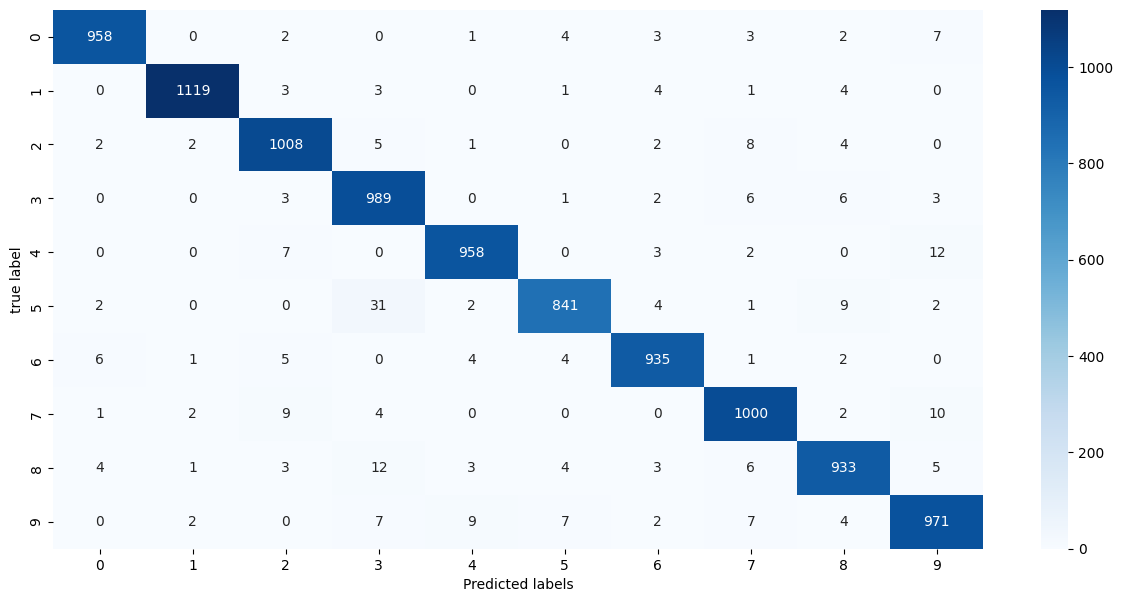

In [23]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap ='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('true label')

**Building a Predictive System**

In [24]:
#!wget 'https://i0.wp.com/searchingforbole.com/wp-content/uploads/2018/01/mnist-0-1-joined1.png?w=308&h=308&crop=1&ssl=1'

In [25]:
image = cv2.imread('/content/MNIST_digit.png')

In [26]:
type(image)

numpy.ndarray

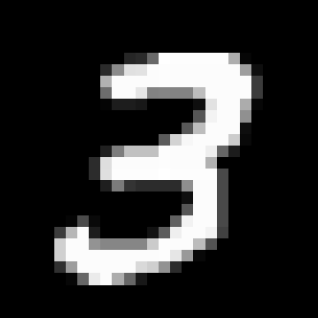

In [27]:
cv2_imshow(image)

In [28]:
image.shape

(318, 318, 3)

In [29]:
greyscale = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [30]:
greyscale.shape

(318, 318)

In [31]:
image_resized = cv2.resize(greyscale,(28,28))

In [32]:
image_resized.shape

(28, 28)

In [33]:
cv2_imshow(image_resized)

In [34]:
print(image_resized)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 131 133 13

In [35]:
image_resized = image_resized/255

In [36]:
print(image_resized)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [37]:
image_reshaped = np.reshape(image_resized,[1,28,28])

In [38]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[2.6410174e-12 2.6943936e-04 1.0854968e-05 1.0000000e+00 1.2317813e-08
  1.0596557e-03 1.4513928e-16 1.0740896e-04 3.4766304e-04 9.7710401e-01]]


In [39]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


In [67]:
#!wget 'https://copyassignment.com/wp-content/uploads/2022/05/b1.png'

--2024-10-01 15:19:32--  https://copyassignment.com/wp-content/uploads/2022/05/b1.png
Resolving copyassignment.com (copyassignment.com)... 157.173.216.206
Connecting to copyassignment.com (copyassignment.com)|157.173.216.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3628 (3.5K) [image/png]
Saving to: ‘b1.png’

b1.png              100%[===================>]   3.54K  --.-KB/s    in 0s      

2024-10-01 15:19:33 (52.7 MB/s) - ‘b1.png’ saved [3628/3628]



Path of the image to be predicted/content/b1.png


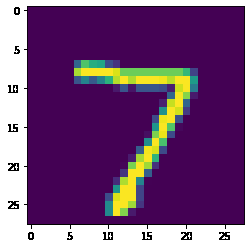

(248, 251, 3)
(248, 251)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1.9521985e-16 5.1839511e-25 1.1753531e-01 9.9757409e-01 0.0000000e+00
  8.1491066e-15 0.0000000e+00 1.0000000e+00 3.9300279e-19 1.7511215e-16]]
The digit is recognized as 7


In [68]:
input_image_path = input('Path of the image to be predicted')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
print(input_image.shape)
greyscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
print(greyscale.shape)
image_resized = cv2.resize(greyscale,(28,28))
image_resized = image_resized/255
image_reshaped = np.reshape(image_resized,[1,28,28])
prediction = model.predict(image_reshaped)
print(prediction)
pred_label = np.argmax(prediction)
print('The digit is recognized as',pred_label)